In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def CountSecond(time):
    start_time = [5, 35, 0]
    times = time.split(':')
    h = int(times[0]) - start_time[0]
    m = int(times[1]) - start_time[1]
    s = int(times[2]) - start_time[2]
    return h * 3600 + m * 60 + s

def rawData(filename):
    countDict = {item: 0 for item in range(221)}

    fp = open(filename, 'r')
    for line in fp:
        rets = line.strip().split(',')
        fmin = int(CountSecond(rets[3]) / 300)

        if fmin in countDict:
            countDict[fmin] += 1
    countList = sorted(countDict.items(), key=lambda x: x[0])
    value = []
    for item in countList:
        value.append(item[1])
    return value

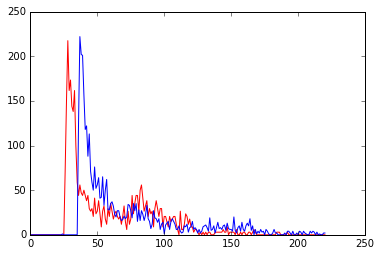

In [5]:
value1 = rawData('mahang_01.csv')
value2 = rawData('mahang_11.csv')#--> 8

value = []
for i in range(len(value1)):
    value.append(value1[i] + value2[i])

scale = sum(value2) / float(sum(value1))
value1 = [item*scale for item in value1]

plt.plot(value1, color='r')
plt.plot(value2, color='b')

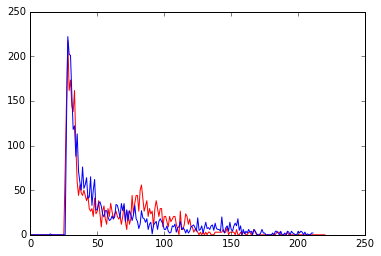

In [6]:
plt.plot(value1, color='r')
plt.plot(value2[9:], color='b')

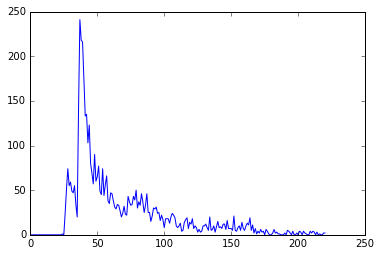

In [7]:
plt.plot(value)

In [50]:
s = sum(value)
quater = 0
for i in range(len(value)):
    quater += value[i]
    if quater/float(s) > 0.8:
        print(i)
        break

92


In [1]:
import pandas as pd
data = pd.read_csv('mahang_11_finished.csv', header=None)
data.columns = ['phone', 'lat', 'lng', 'time']
data['time']=pd.to_timedelta(data['time'])

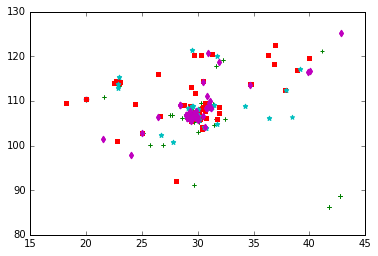

In [2]:
import matplotlib.pyplot as plt
import time
%matplotlib inline
t1 = data[data['time'] < pd.to_timedelta('08:00:00')]
plt.scatter(t1.lat, t1.lng, color='b')
t2 = data[(data['time'] > pd.to_timedelta('08:40:00')) & (data['time'] < pd.to_timedelta('08:50:00'))]
plt.scatter(t2.lat, t2.lng, color='g', marker='+')
t3 = data[(data['time'] > pd.to_timedelta('08:50:00')) & (data['time'] < pd.to_timedelta('09:00:00'))]
plt.scatter(t3.lat, t3.lng, color='r',marker='s')
t4 = data[(data['time'] > pd.to_timedelta('09:00:00')) & (data['time'] < pd.to_timedelta('09:10:00'))]
plt.scatter(t4.lat, t4.lng, color='c',marker='*')
t5 = data[(data['time'] > pd.to_timedelta('09:10:00')) & (data['time'] < pd.to_timedelta('09:20:00'))]
plt.scatter(t5.lat, t5.lng, color='m',marker='d')

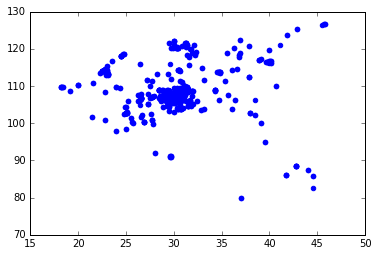

In [3]:
plt.scatter(data.lat, data.lng, color='b')

In [4]:
from sklearn.cluster import KMeans
cl = KMeans(9, max_iter=300,n_jobs=10)
X = data[['lat','lng']].dropna()
cl.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=9, n_init=10,
    n_jobs=10, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [5]:
xy = zip(X.itertuples(), list(cl.labels_))

In [6]:
scatter_dict = {}
for item in xy:
    if item[-1] in scatter_dict:
        scatter_dict[item[-1]].append((item[0].lat, item[0].lng))
    else:
        scatter_dict[item[-1]] = [(item[0].lat, item[0].lng),]

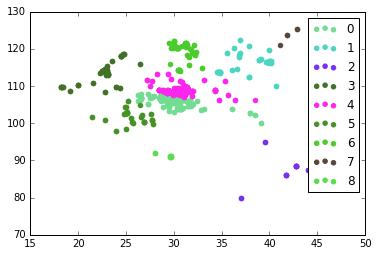

In [7]:
import random
for key, value in scatter_dict.items():
    c = hex(random.randint(1, 2**23)).replace('0x', '#').ljust(7,"c")
    plt.scatter(*zip(*value), color=c, label=key)
plt.legend()